# Aplicação de detecção de anomalia utilizando COPOD

In [21]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.copod import COPOD
from sklearn.decomposition import PCA
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
#Carregar dataset - X_train
dataset = pd.read_excel("pzt2.xlsx", header=None)

display(dataset)

In [ ]:
#Tratamento do dataset - Transpor dados
data = dataset.T

display(data)

In [ ]:
#Tratamento do dataset - Remover linha da frequencia "0" e as linhas correspondentes a amostra para teste
new_data = data.drop([0, 2, 3, 4, 5, 6, 17, 77, 137, 197, 257, 317, 332, 662, 992, 1322, 1652, 1982, 2312, 2642], axis=0)

display(new_data)

In [5]:
#Tratamento do dataset - Verificar tipo de dados
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 1 to 2970
Columns: 4000 entries, 0 to 3999
dtypes: float64(4000)
memory usage: 90.1 MB


In [6]:
#Aplicando PCA - X_train
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_data)
principalDf = pd.DataFrame(data= principalComponents)

display(principalDf)

,0,1
0,-3739.819298,-2500.034382
1,-3740.277808,-2502.859177
2,-3732.819369,-2500.966344
3,-3739.514654,-2501.099658
4,-3740.721615,-2502.989555
...,...,...
2946,4493.747477,-3107.316259
2947,4493.231924,-3106.556191
2948,4496.120065,-3104.047839
2949,4516.510843,-3090.237409


In [7]:
#Definindo dados de treinamento
X_train = principalDf

y_train = []
for i in range(2951):
    y = 0 if i < 660 else 1
    y_train.append(y)

In [8]:
#Aplicar COPOD nos dados
detector = COPOD()
detector.fit(X_train)

COPOD(contamination=0.1, n_jobs=1)

In [9]:
#Predição e Pontuações atípicas - X_train
y_train_pred = detector.labels_  
y_train_scores = detector.decision_scores_  

In [ ]:
#Carregar dataset - X_test
dataset_test = pd.read_excel("Amostra-PZT.xlsx")

display(dataset_test)

In [ ]:
#Tratamento do dataset - Transpor dados - X-test
data_test = dataset_test.T

display(data_test)

In [ ]:
#Tratamento do dataset - Remover linha da frequencia "0" - X_test
new_data_test = data_test.drop("Frequencia", axis=0)

display(new_data_test)

In [14]:
#Tratamento do dataset - Verificar tipo de dados - X_test
new_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2 to 2642
Columns: 4000 entries, 0 to 3999
dtypes: float64(4000)
memory usage: 593.9+ KB


In [15]:
#Aplicando PCA - X_test
pca_test = PCA(n_components=2)
principalComponents_test = pca_test.fit_transform(new_data_test)
principalDf_test = pd.DataFrame(data= principalComponents_test)

display(principalDf_test)

,0,1
0,-991.600190,-2100.569600
1,-995.839618,-2103.472314
2,-997.381667,-2112.376735
3,-1013.554254,-2110.668149
4,-1006.393358,-2109.423977
5,-1046.835986,-2112.649329
6,-605.545202,512.674738
7,-847.448551,2618.516173
8,-1269.882544,5346.434862
9,-1850.804551,7065.006795


In [16]:
#Definindo dados de teste
X_test = principalDf_test

y_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
#Predição e Pontuações atípicas - X_test
y_test_pred = detector.predict(X_test) 
y_test_scores = detector.decision_function(X_test)

In [18]:
#Visualização das pontuações
clf_name = 'COPOD'
print("\nDados de treinamento:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nDados de teste:")
evaluate_print(clf_name, y_test, y_test_scores)


Dados de treinamento:
COPOD ROC:0.4791, precision @ rank n:0.797

Dados de teste:
COPOD ROC:0.125, precision @ rank n:0.125


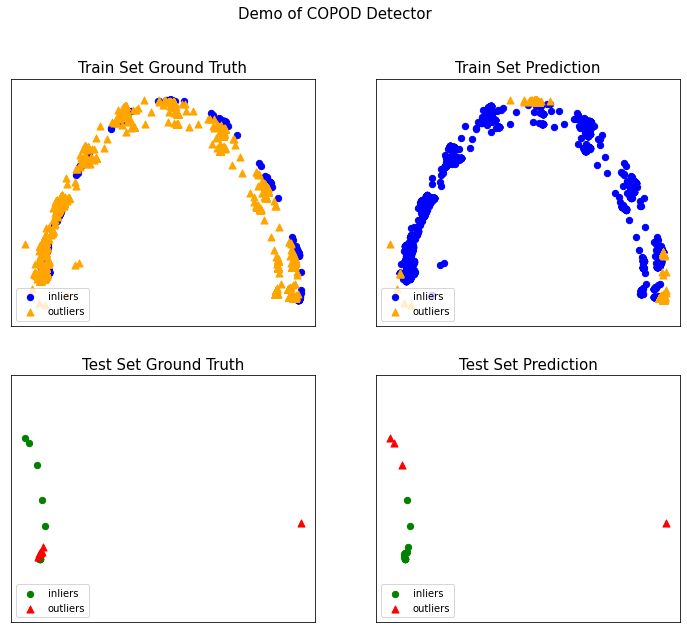

In [19]:
#Visualizando os resultados
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

C:\Users\Meu Computador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Meu Computador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Outlier score')

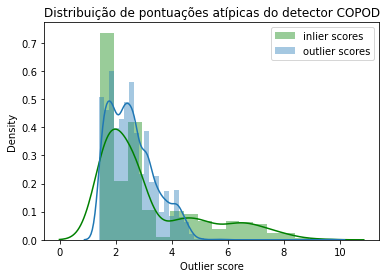

In [22]:
X = np.concatenate([X_train, X_test], axis=0)
ys = np.concatenate([y_train, y_test])

scores = detector.decision_function(X)

sns.distplot(scores[ys==0], label="inlier scores", color="green")
sns.distplot(scores[ys==1], label="outlier scores").set_title("Distribuição de pontuações atípicas do detector COPOD")
plt.legend()
plt.xlabel("Outlier score")

<AxesSubplot:>

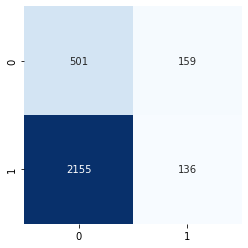

In [23]:
#Matriz de confusão: Dados de treinamento
from sklearn.metrics import confusion_matrix
import seaborn as sns

mc = confusion_matrix(y_train, y_train_pred)
sns.heatmap(mc, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)